# Fig. 1 MPSA Analysis


In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logomaker as lm
import re
import sys
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Polygon

# My functions
sys.path.insert(0,'../')
import utils

# Useful variables
e = np.exp(1)
idx = pd.IndexSlice
_ = np.newaxis

# Load style file
plt.style.use('../fig.style')

In [2]:
# Load motifs
motifs = pd.read_excel('../data/iupac_motifs.xlsx', index_col=0)['iupac']
motifs

name
wt           AGGA/GUAAGU
cons         NCAG/GUAAGU
neg          NCAG/GGAAGA
ris_iupac    ANGA/GUHDNN
hyp_iupac    NAGA/GUNNNN
ris_min      ANGA/GUADGN
hyp_min      RAGA/GURNGN
ris_max      ANGA/GUHDNN
hyp_max      NANN/GUNNNN
Name: iupac, dtype: object

In [3]:
# Load MPSA data
smn2_df = pd.read_csv('../data/mpsa_data_smn2.csv', index_col=0)
smn2_df.head()

smn2_dmso  smn2_dmso_log_std    smn2_rg  smn2_rg_log_std   
ss                                                                      
AAAA/GUAAGU  94.816183           0.038251  74.969468         0.043137  \
AACA/GUAAGU  86.257933           0.043625  72.047758         0.056629   
AAGA/GUAAAU   0.119696           0.279578   0.000000         0.533347   
AAGA/GUAACU   0.208651           0.125712   0.000000         0.479768   
AAGA/GUAAGA   0.496079           0.270210  23.553215         0.141298   

              smn2_nvs  smn2_nvs_log_std  
ss                                        
AAAA/GUAAGU  81.631149          0.056442  
AACA/GUAAGU  90.199186          0.064540  
AAGA/GUAAAU   0.384295          0.314739  
AAGA/GUAACU   0.209434          0.237570  
AAGA/GUAAGA  76.988843          0.059458

/Users/jkinney/miniforge3_arm64/envs/mavenn/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


smn2_rg
wt: y=83
cons median: y=100
null median: y=0.27
smn2_nvs
wt: y=97
cons median: y=100
null median: y=0.38
smn2_dmso
wt: y=25
cons median: y=100
null median: y=0.30


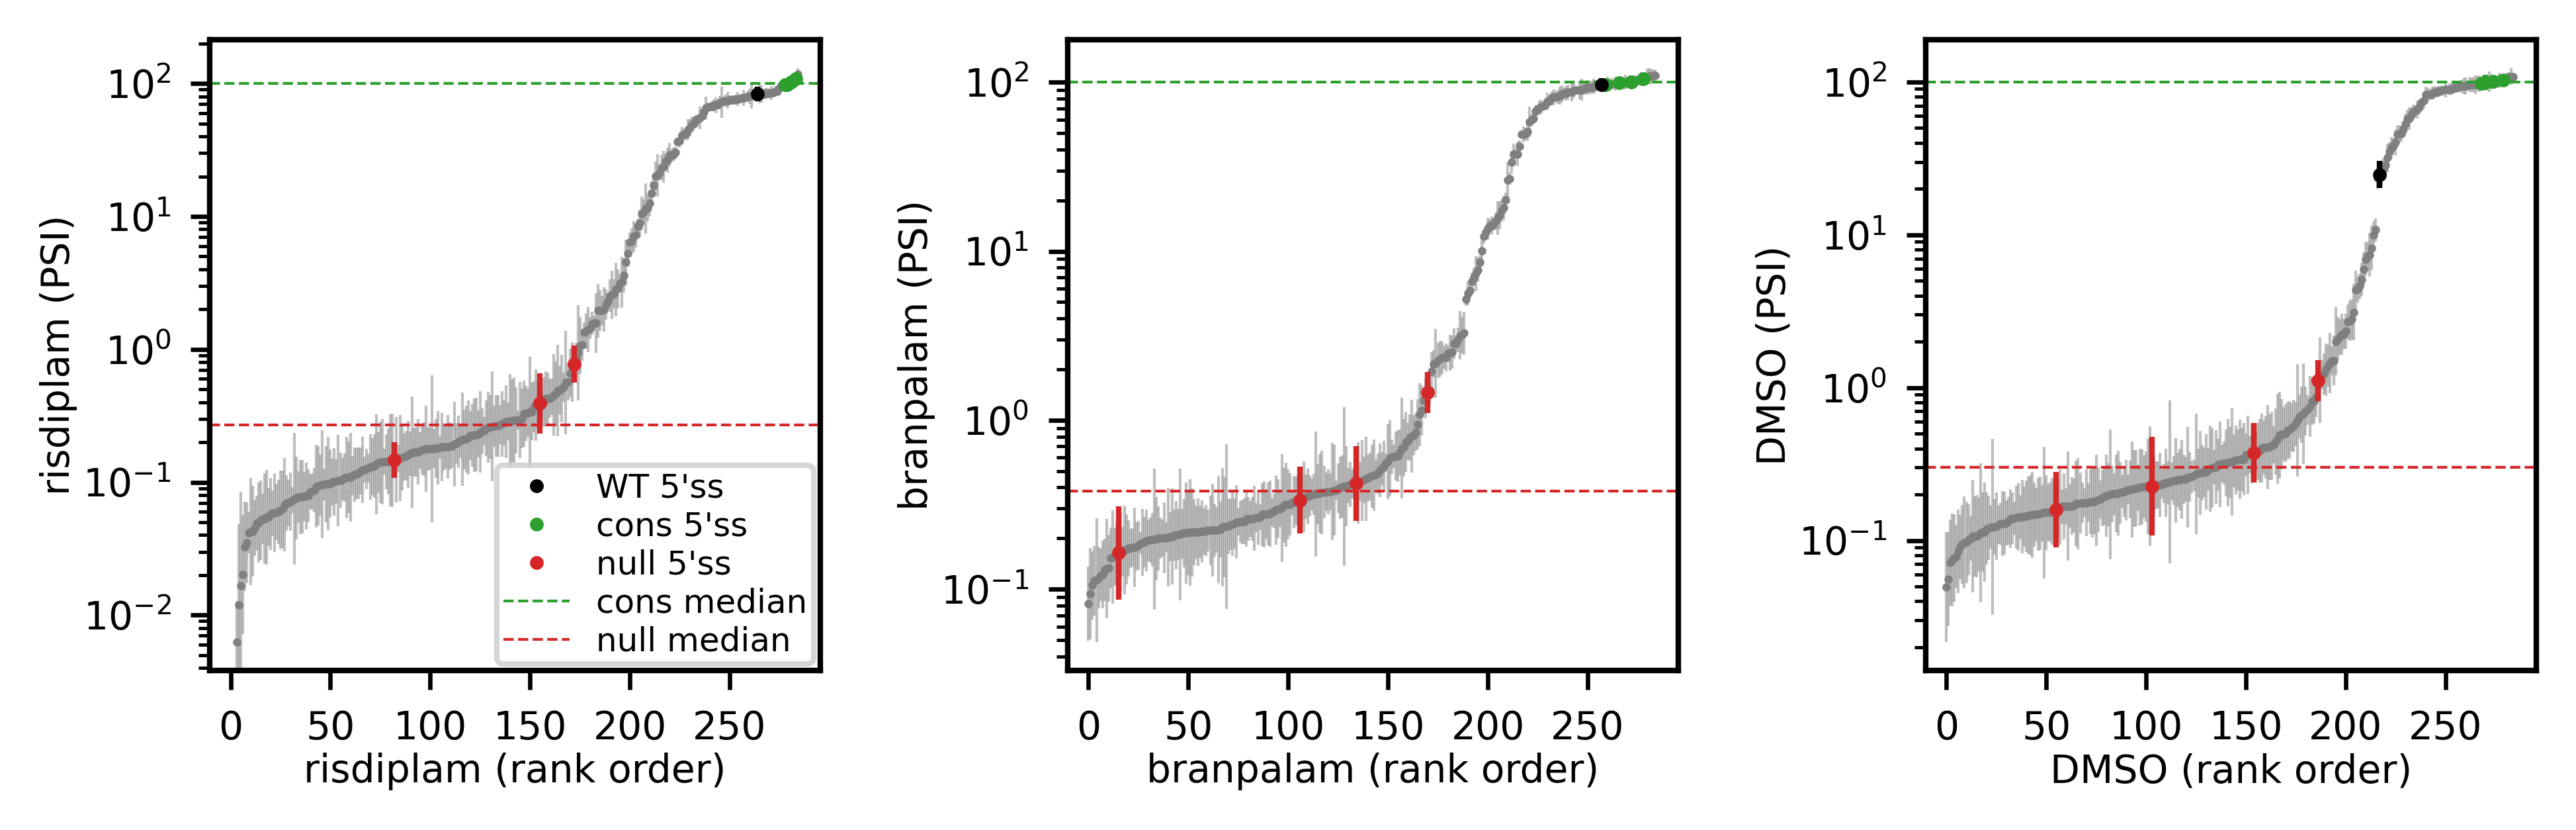

In [4]:
# Plot FigS1ABC

y_cols = ['smn2_dmso', 'smn2_rg', 'smn2_nvs']
dy_cols = [col+'_log_std' for col in y_cols]
num_5ss = len(smn2_df)

# Set sequences
seqs = smn2_df.index.values

# Set known motif indices and view quantities
wt_ix = utils.motif_to_ix(motifs['wt'], seqs)
cons_ix = utils.motif_to_ix(motifs['cons'], seqs) 
null_ix = utils.motif_to_ix(motifs['neg'], seqs)

def draw(psi_col, ax, drug):
    y = smn2_df[psi_col]
    dy = smn2_df[psi_col+'_log_std']
    z = 1.96
    s = 1
    yerr = np.array([y - np.exp(np.log(y)-z*dy), np.exp(np.log(y)+z*dy) - y])
    ix = np.argsort(np.argsort(y))
    
    # Plot all data
    print(psi_col)
    ax.plot(ix, y, markersize=1, linewidth=0, marker='.', color='C7', rasterized=True)
    ax.errorbar(x=ix, y=y, yerr=yerr, linewidth=0, elinewidth=.5, alpha=.5, color='C7', rasterized=True)
        
    # Plot WT data
    ax.plot(ix[wt_ix], y[wt_ix], markersize=3, linewidth=0, marker='.', color='k', rasterized=True,
            label='WT 5\'ss', zorder=100)
    print(f'wt: y={y[wt_ix][0]:.0f}')
    ax.errorbar(x=ix[wt_ix], y=y[wt_ix], yerr=yerr[:,wt_ix], 
                linewidth=0, elinewidth=1, alpha=1, color='k', rasterized=True)
        
    # Plot cons data
    y_cons_med = y[cons_ix].median()
    print(f'cons median: y={y_cons_med:.0f}')
    ax.plot(ix[cons_ix], y[cons_ix], markersize=3, linewidth=0, marker='.', color='C2', rasterized=True,
            label='cons 5\'ss')
    ax.errorbar(x=ix[cons_ix], y=y[cons_ix], yerr=yerr[:,cons_ix], 
                linewidth=0, elinewidth=1, alpha=1, color='C2', rasterized=True)
    
    # Plot null data
    y_null_med = y[null_ix].median()
    print(f'null median: y={y_null_med:.2f}')
    ax.plot(ix[null_ix], y[null_ix], markersize=3, linewidth=0, marker='.', color='C3', rasterized=True,
            label='null 5\'ss')
    ax.errorbar(x=ix[null_ix], y=y[null_ix], yerr=yerr[:,null_ix], 
                linewidth=0, elinewidth=1, alpha=1, color='C3', rasterized=True)
    
    # Plot cons and null median lines
    ax.axhline(y_cons_med, alpha=1, linewidth=0.5, linestyle='--', color='C2', label='cons median')
    ax.axhline(y_null_med, alpha=1, linewidth=0.5, linestyle='--', color='C3', label='null median')
    
    # Style plot
    ax.set_yscale('log')
    ax.set_xlim([-10.5, num_5ss+10.5])
    ax.set_xticks([0, 50, 100, 150, 200, 250])
    #ax.axhline(100, linestyle=':', linewidth=.5, color='k', zorder=-100)
    #ax.axhline(100, linestyle='--', color='k', alpha=.2, zorder=-100, linewidth=.5, rasterized=True)
    ax.set_xlabel(f'{drug} (rank order)')
    ax.set_ylabel(f'{drug} (PSI)')
    
# Make figure S1
fig, axs = plt.subplots(1,3,figsize=[6.5, 2.1], sharey=False)

# A
draw(ax=axs[0],
     drug='risdiplam',
     psi_col='smn2_rg')
axs[0].legend(fontsize=6, loc='lower right')

# B
draw(ax=axs[1],
     drug='branpalam',
     psi_col='smn2_nvs')

#C
draw(ax=axs[2],
     drug='DMSO',
     psi_col='smn2_dmso')

# Save fig
fig.tight_layout(w_pad=2)
fig.savefig('figS1ABC.pdf')

In [ ]:
# Plot FigS1DEF

# Define function to plot results
s = 20
bulkalpha=.5
si_figsize = [3.25,3.25]
figsize = [2,2]
N = len(seqs)
lims = [3E-2, 3E2]

# Shared ax style
def style_ax(ax, xlabel=None, ylabel=None, legend=True):
    ticks = [1E-1, 1E0, 1E1, 1E2]
    lim = [3E-2, 3E2]
    
    ax.axhline(100, linestyle='--', color='k', alpha=.2, zorder=-100, linewidth=.5, rasterized=True)
    ax.axvline(100, linestyle='--', color='k', alpha=.2, zorder=-100, linewidth=.5, rasterized=True)
    ax.plot(lim, lim, 'k:', alpha=.2, zorder=-100, linewidth=.5, rasterized=True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_aspect('equal')
    ax.minorticks_on()
    
    if legend:
        ax.legend(loc='lower right', framealpha=1, fontsize=6)

# Plot raw risdiplam values
z = 1.96

# Make figure
fig, axs = plt.subplots(1,3,figsize=[6.5,2.1])

xcols_xlabels_list = [('smn2_dmso', 'DMSO (PSI)'),
                      ('smn2_dmso', 'DMSO (PSI)'),
                      ('smn2_rg', 'risdiplam (PSI)')]

ycols_ylabels_list = [('smn2_rg', 'risdiplam (PSI)'),
                      ('smn2_nvs', 'branaplam (PSI)'),
                      ('smn2_nvs', 'branaplam (PSI)')]

# Iterate over risdiplam and branaplam
for i, ((xcol, xlabel), (ycol, ylabel)) in enumerate(zip(xcols_xlabels_list, ycols_ylabels_list)):
    
    # Set ax
    ax = axs[i]
    
    # Set risdiplam/DMSO specific data
    x=smn2_df[xcol] 
    dx = smn2_df[xcol+'_log_std']
    xerr = np.array([x - np.exp(np.log(x)-z*dx), np.exp(np.log(x)+z*dx) - x])
    
    # Set y coordinate
    y=smn2_df[ycol]
    dy = smn2_df[ycol+'_log_std']
    yerr = np.array([y - np.exp(np.log(y)-z*dy), np.exp(np.log(y)+z*dy) - y])
  
    # Plot all data
    ax.scatter(x, y, alpha=bulkalpha, s=s, linewidth=0, color='C7')
    ax.errorbar(x=x, y=y, xerr=xerr, yerr=yerr, 
                linewidth=0, elinewidth=.5, alpha=.5, color='C7', rasterized=True,
                zorder=-100)

    # Plot WT data
    ax.plot(x[wt_ix], y[wt_ix], markersize=3, linewidth=0, marker='.', color='k', rasterized=True,
            label='WT 5\'ss', zorder=100)
    print(f'wt: y={y[wt_ix][0]:.0f}')
    ax.errorbar(x=x[wt_ix], y=y[wt_ix], xerr=xerr[:,wt_ix], yerr=yerr[:,wt_ix], 
                linewidth=0, elinewidth=1, alpha=1, color='k', rasterized=True)
        
    # Plot cons data
    x_cons_med = x[cons_ix].median()
    y_cons_med = y[cons_ix].median()
    ax.plot(x[cons_ix], y[cons_ix], markersize=3, linewidth=0, marker='.', color='C2', rasterized=True,
            label='cons 5\'ss')
    ax.errorbar(x=x[cons_ix], y=y[cons_ix], xerr=xerr[:,cons_ix], yerr=yerr[:,cons_ix], 
                linewidth=0, elinewidth=1, alpha=1, color='C2', rasterized=True)
    
    # Plot null data
    x_null_med = x[null_ix].median()
    y_null_med = y[null_ix].median()
    ax.plot(x[null_ix], y[null_ix], markersize=3, linewidth=0, marker='.', color='C3', rasterized=True,
            label='null 5\'ss')
    ax.errorbar(x=x[null_ix], y=y[null_ix], xerr=xerr[:,null_ix], yerr=yerr[:,null_ix], 
                linewidth=0, elinewidth=1, alpha=1, color='C3', rasterized=True)
    
    # Plot cons and null median lines
    ax.axvline(x_cons_med, alpha=1, linewidth=0.5, linestyle='--', color='C2', label='cons median')
    ax.axhline(y_cons_med, alpha=1, linewidth=0.5, linestyle='--', color='C2')
    ax.axvline(x_null_med, alpha=1, linewidth=0.5, linestyle='--', color='C3', label='null median')
    ax.axhline(y_null_med, alpha=1, linewidth=0.5, linestyle='--', color='C3')

    # Style ax
    style_ax(ax, xlabel=xlabel, ylabel=ylabel)

    utils.add_click_labels(x, y, seqs, ax)
    if i==0:
        ax.legend(loc='lower right', framealpha=1, fontsize=6)
    else:
        ax.get_legend().remove()

# Save figure
plt.tight_layout(w_pad=2)
fig_name = 'figS1DEF.pdf'
fig.savefig(fig_name)
print(f'Figure saved to {fig_name}')

/Users/jkinney/miniforge3_arm64/envs/mavenn/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jkinney/miniforge3_arm64/envs/mavenn/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


wt: y=83
wt: y=97
wt: y=97
Figure saved to figS1DEF.pdf


In [ ]:
# Set psi data
psi_dmso = smn2_df['smn2_dmso']
psi_bran = smn2_df['smn2_nvs']
psi_ris = smn2_df['smn2_rg'] 

# Compute median null PSI for 3 treatments
psi_dmso_null = psi_dmso[null_ix].median()
psi_bran_null = psi_bran[null_ix].median()
psi_ris_null = psi_ris[null_ix].median()

print(f'psi_dmso_null = {psi_dmso_null}')
print(f'psi_bran_null = {psi_bran_null}')
print(f'psi_ris_null = {psi_ris_null}')

# Define positive and negative regions for risdiplam treatment
ris_pos_xy, ris_neg_xy = utils.get_cut_polygons(
                                bg_x_psi=psi_dmso_null,
                                bg_y_psi=psi_ris_null,
                                neg_fold=3,
                                pos_fold=4,
                                lo_psi=.67,
                                hi_psi=67,
                                lims=lims)

# Define positive and negative regions for branaplam treatment
bran_pos_xy, bran_neg_xy = utils.get_cut_polygons(
                                bg_x_psi=psi_dmso_null,
                                bg_y_psi=psi_bran_null,
                                neg_fold=3,
                                pos_fold=6,
                                lo_psi=1.2,
                                hi_psi=40,
                                lims=lims)

# Define positive and negative regions for hyper motif
hyp_pos_xy, hyp_neg_xy = utils.get_cut_polygons(
                                bg_x_psi=psi_ris_null,
                                bg_y_psi=psi_bran_null,
                                neg_fold=3,
                                pos_fold=6,
                                lo_psi=1.2,
                                hi_psi=40,
                                lims=lims)

In [ ]:
# Function to draw probability logos
def draw_logo(motif, ax, title, highlight=(), min_motif=None):
    L = 10
    xticklabels = [f'{x:+d}' for x in range(-4,7) if not x==0]
    motif_df = lm.sequence_to_matrix(motif.replace('/','').replace('U','T'), 
                                     is_iupac=True)
    motif_df.columns = list('ACGU')
    logo = lm.Logo(motif_df, 
                   stack_order='fixed',
                   ax=ax, 
                   show_spines=False, 
                   baseline_width=0, 
                   font_name='Arial Rounded MT Bold', 
                   width=.9,
                   fade_probabilities=True)
    ax.set_yticks([])
    ax.set_xticks(range(L))
    ax.set_xticklabels(xticklabels)
    ax.set_title(title, fontsize=7)
    ax.tick_params(length=0, labelsize=5, pad=1)
    ax.axvline(3.5, linestyle=':', linewidth=1, color='k')
    #ax.set_ylim([-.05,1.05])
    
    for pos,base in [(+1,'G'),(+2,'U')]:
        pos = pos+4 if pos < 0 else pos+3
        logo.style_single_glyph(c=base, p=pos, color='k')
        
    # Compute which bases are uncertain
    if min_motif:    
        min_motif_df = lm.sequence_to_matrix(min_motif.replace('/','').replace('U','T'), 
                                             is_iupac=True)
        min_motif_df.columns = list('ACGU')
        for pos in range(L-1):
            for base in list('ACGU'):
                if (motif_df.loc[pos,base]>0) and (min_motif_df.loc[pos,base]==0):
                    logo.style_single_glyph(c=base, p=pos, color='gray', alpha=.5)
    
    for pos, base in highlight:
        pos = pos+4 if pos < 0 else pos+3
        logo.style_single_glyph(c=base, p=pos, color='gray', alpha=.5) 

Figure saved to fig1DEF.pdf.

restricted
risdiplam IUPAC motif: 30
restricted
hyper-activation IUPAC motif: 9
Figure saved to figS3ACE.pdf.

permissive
risdiplam IUPAC motif: 81
permissive
hyper-activation IUPAC motif: 22
Figure saved to figS3BDF.pdf.



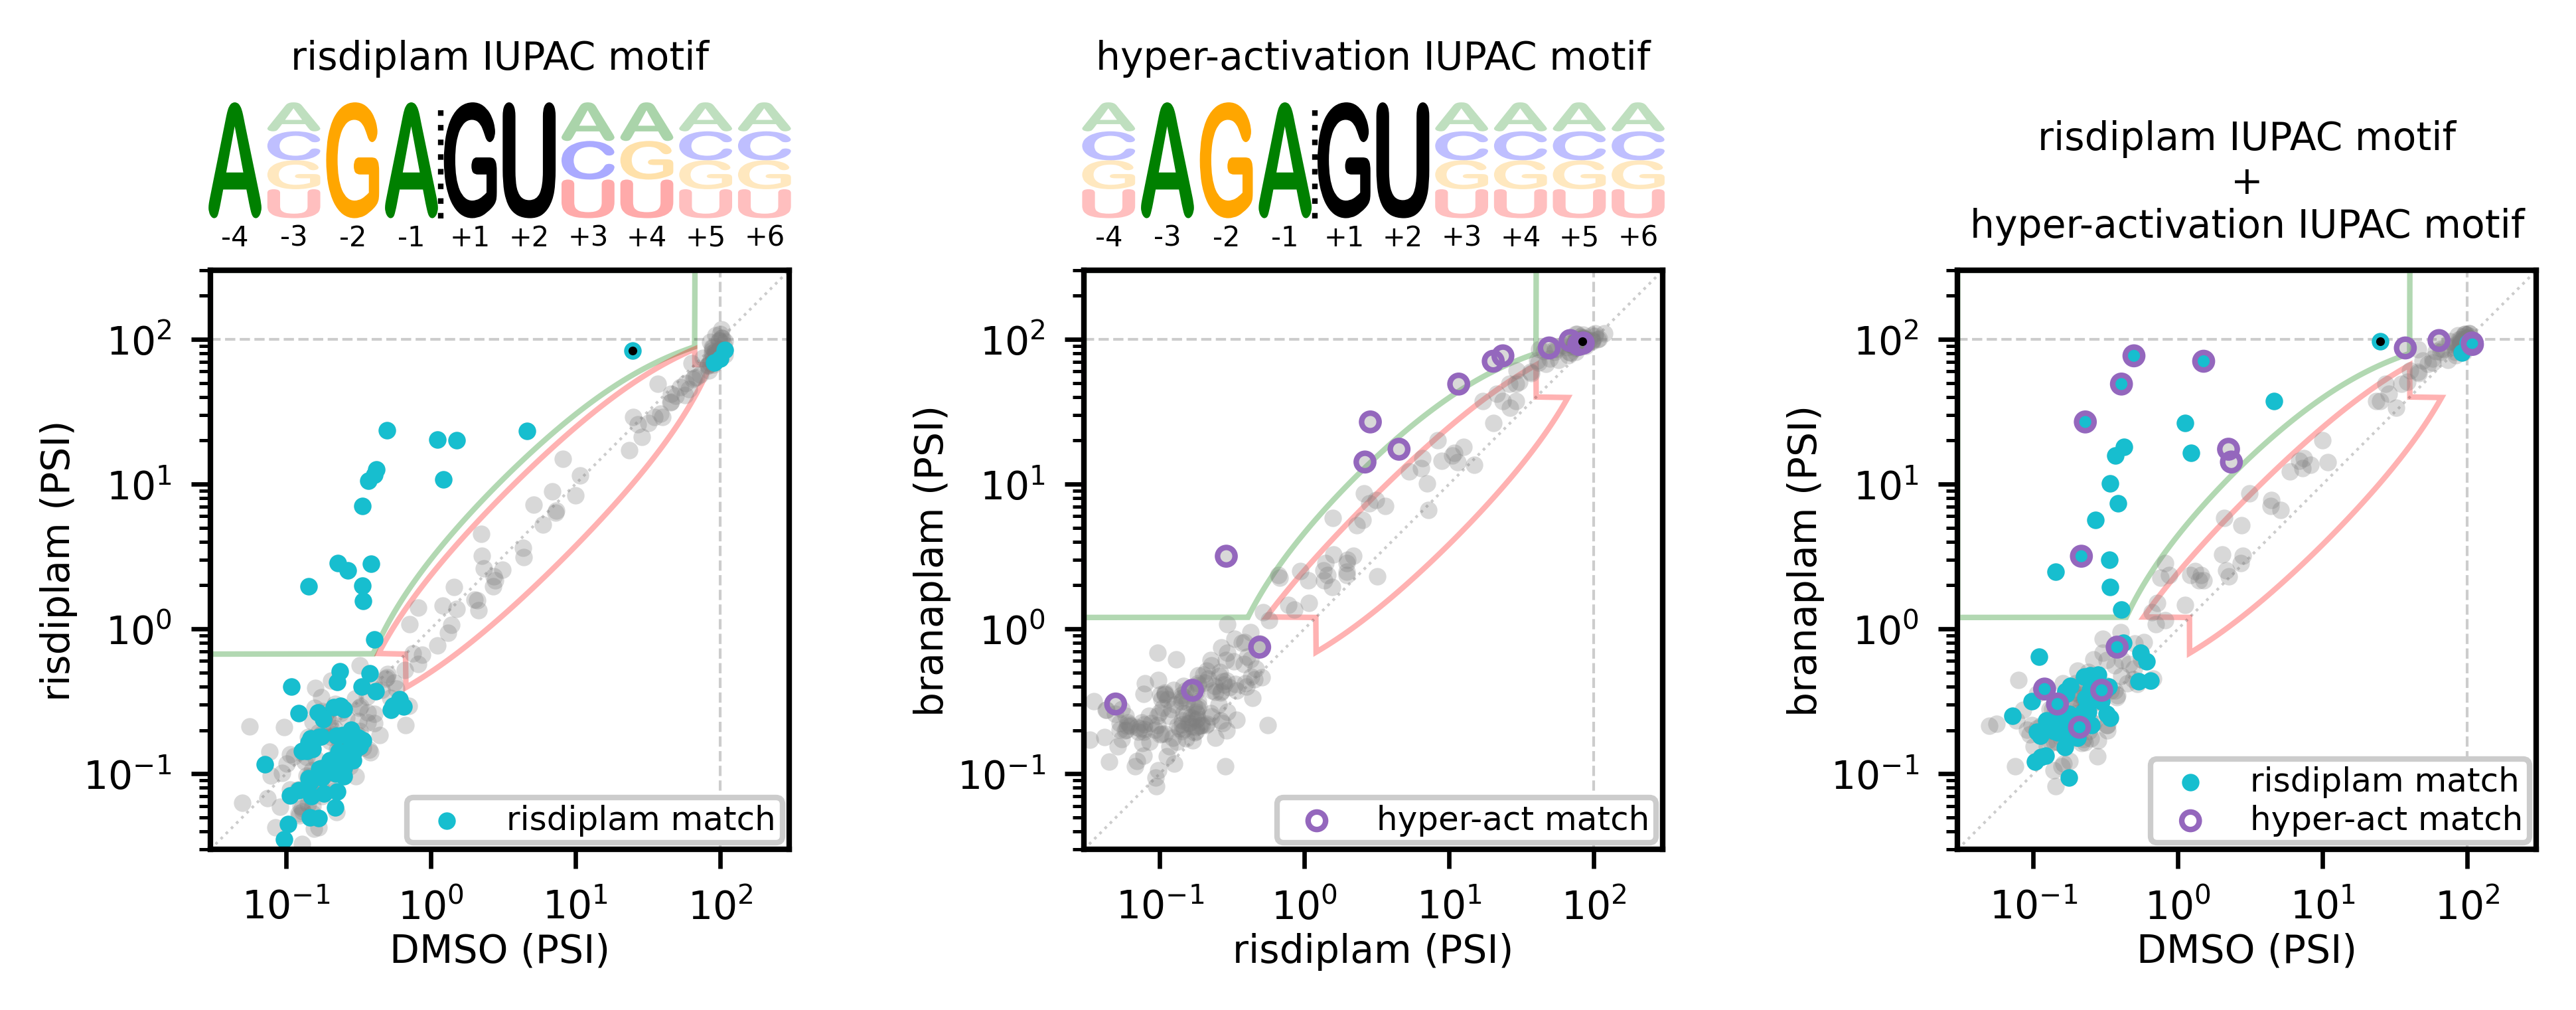

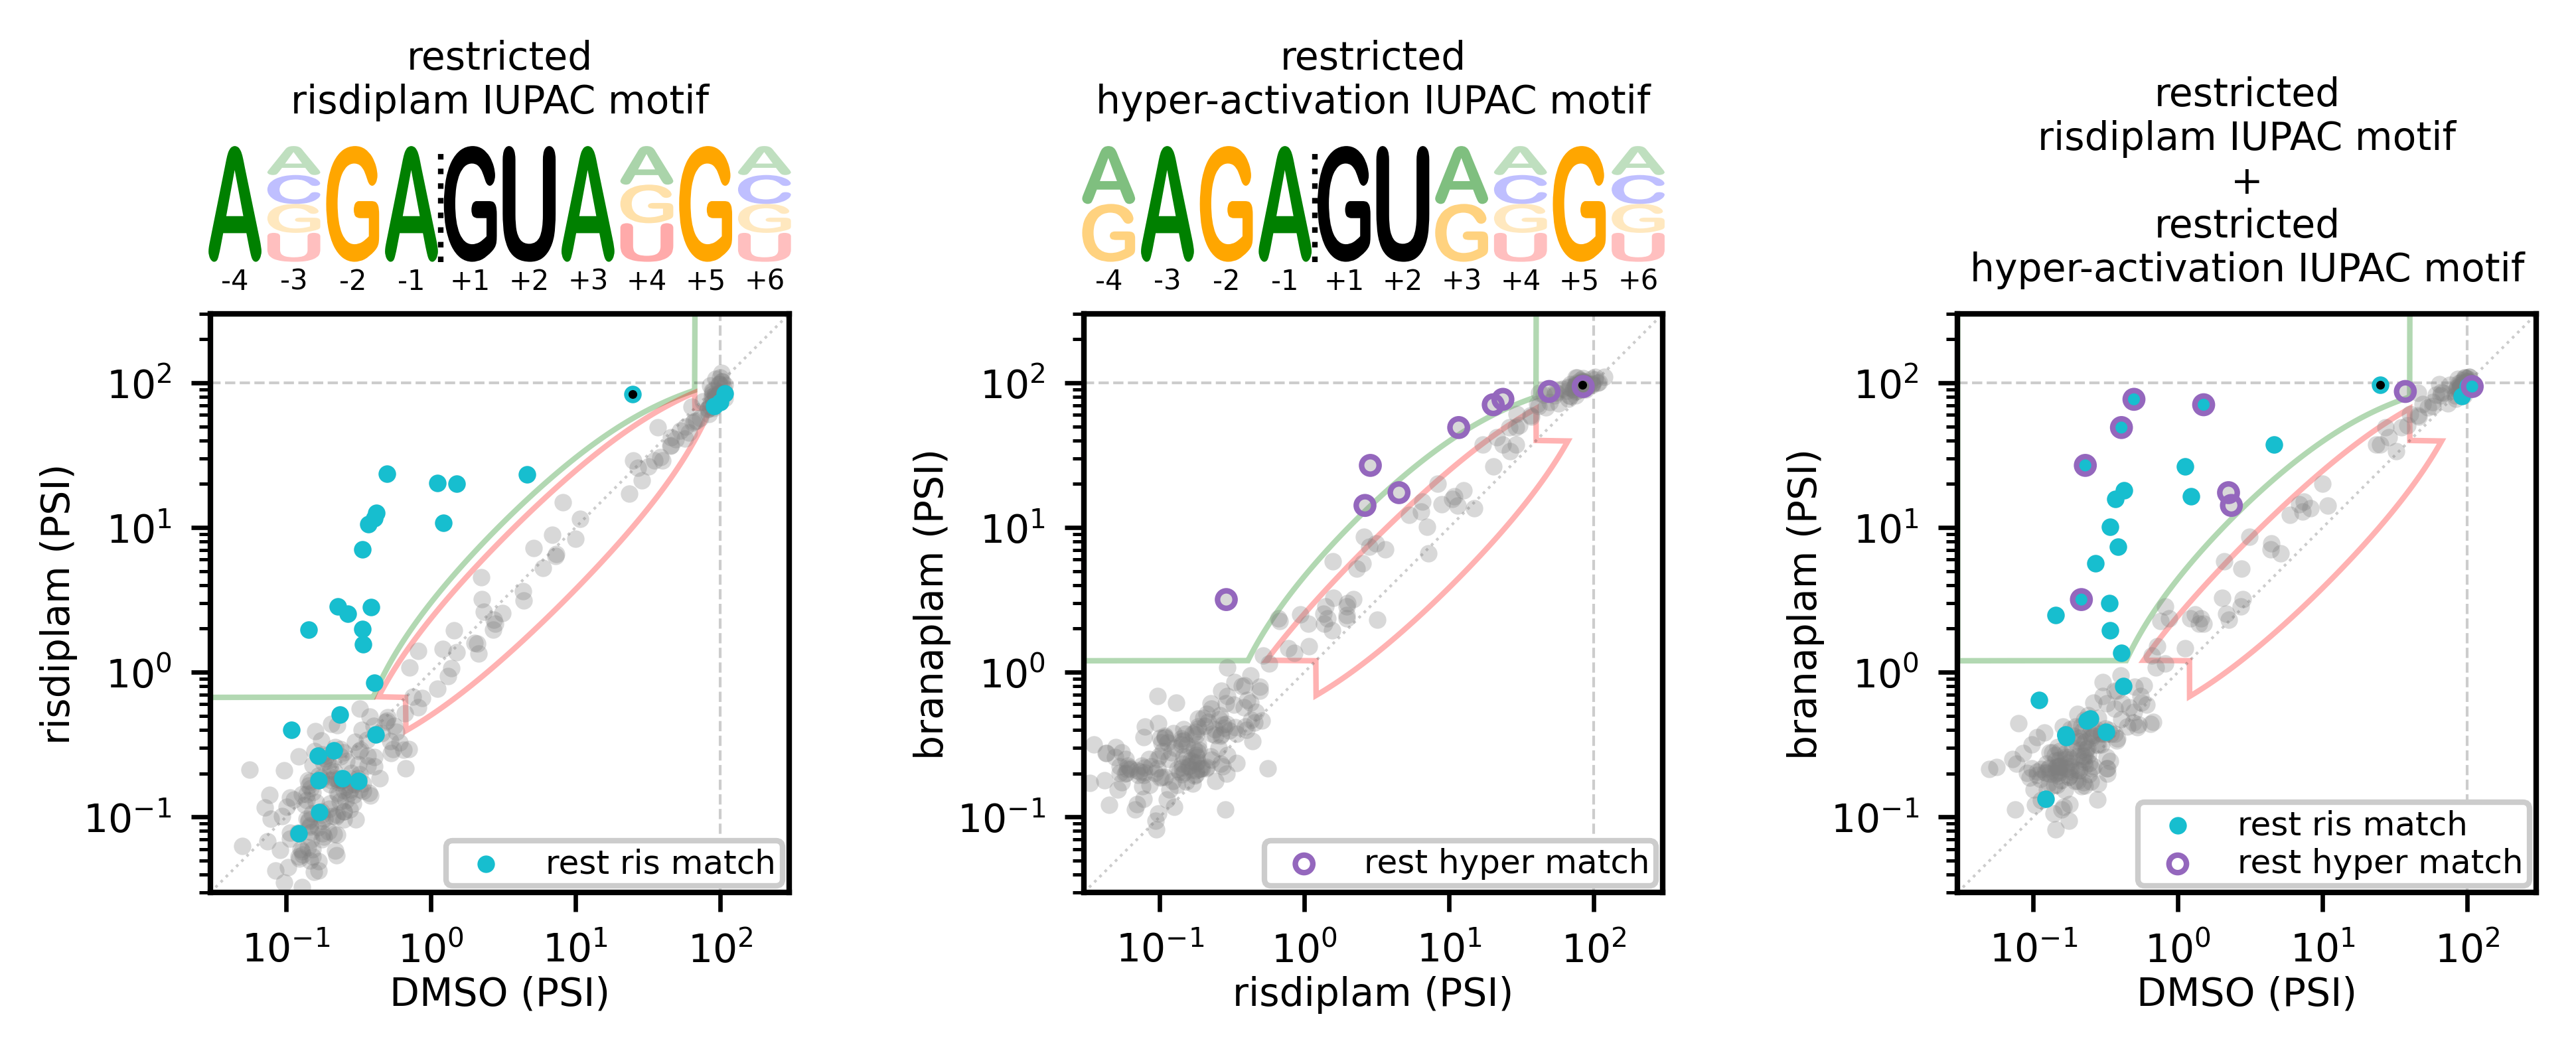

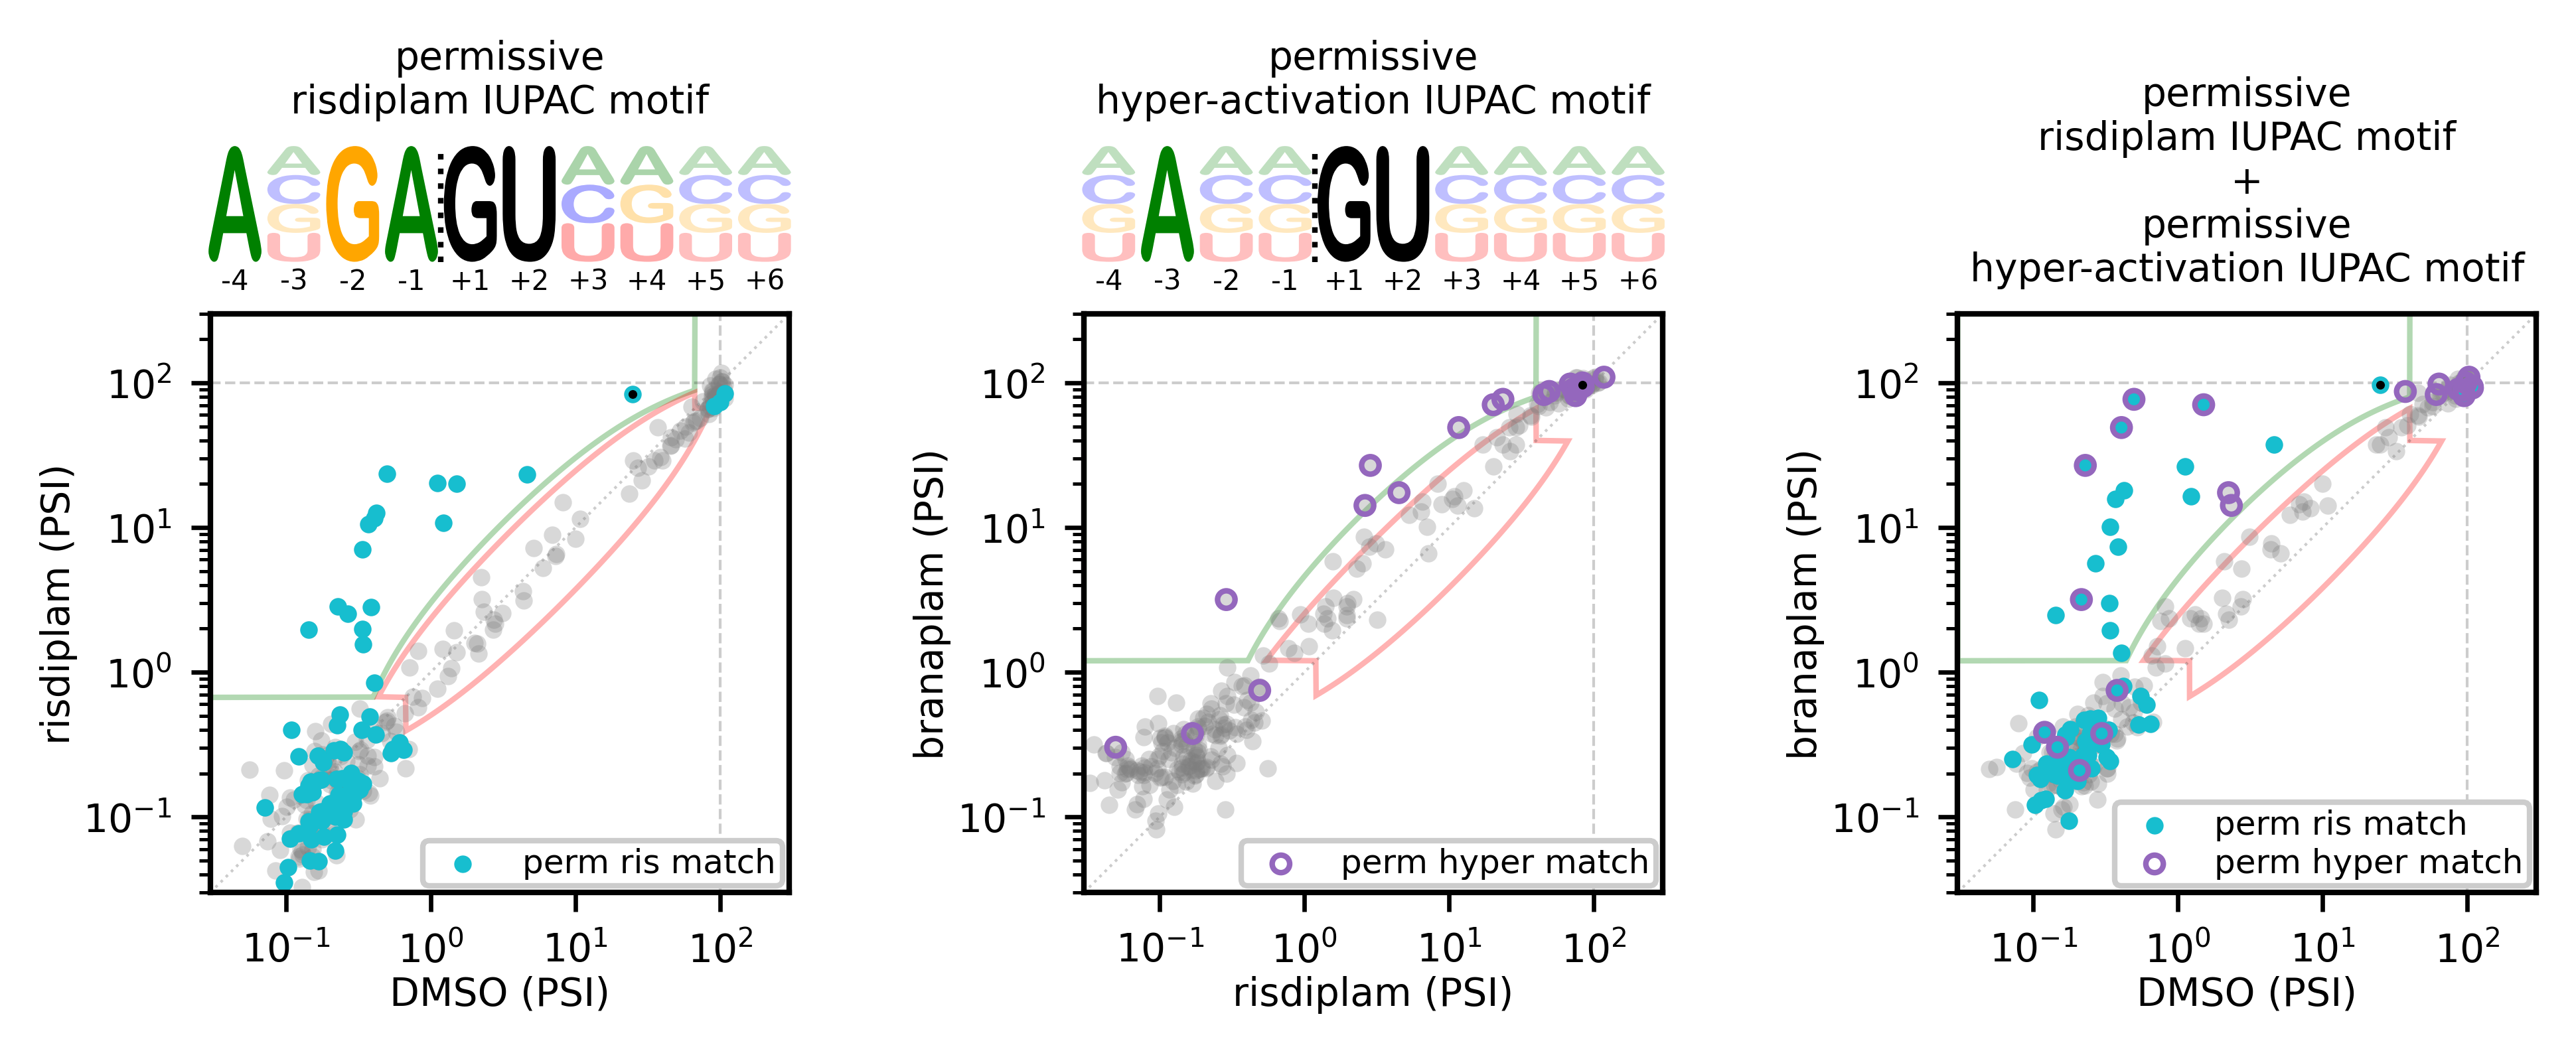

In [8]:
# Plot Fig. 1DEF, Fig. S2ACE, Fig. S2BDF

def mpsa_scatter_plots(
    ris_motif,
    hyp_motif,
    ris_label,
    hyp_label,
    ris_title,
    hyp_title,
    fig_name,
    figsize,
    gridspec_kwargs):

    ris_ix = utils.motif_to_ix(ris_motif, seqs)
    print(f'{ris_title}: {sum(ris_ix)}')
    hyp_ix = utils.motif_to_ix(hyp_motif, seqs)
    print(f'{hyp_title}: {sum(hyp_ix)}')
    
    # Make figure
    fig= plt.figure(figsize=figsize)
    gs = GridSpec(2, 3, **gridspec_kwargs)
    s=10
    bulkalpha=.3
    patch_kwargs = dict(facecolor = 'none', linestyle='-', linewidth=1, alpha=.3, zorder=-100)
    ris_color = 'C9'
    hyp_color = 'C4'

    # Fig. 1D: 
    ax = fig.add_subplot(gs[0,0])
    draw_logo(motif=ris_motif, 
              ax=ax,
              title='')
    ax.set_title(ris_title)

    ax = fig.add_subplot(gs[1,0])
    ax.add_patch(Polygon(ris_pos_xy, edgecolor='g', **patch_kwargs))
    ax.add_patch(Polygon(ris_neg_xy, edgecolor='r', **patch_kwargs))
    ax.scatter(psi_dmso, psi_ris, alpha=bulkalpha, s=s, linewidth=0, color='C7')
    ax.scatter(psi_dmso[wt_ix], psi_ris[wt_ix], alpha=1, s=s/4, linewidth=0, color='k', zorder=100)
    ax.scatter(psi_dmso[ris_ix], psi_ris[ris_ix], alpha=1, s=s, linewidth=0, 
               facecolor=ris_color, label=ris_label)
    style_ax(ax, xlabel='DMSO (PSI)', ylabel='risdiplam (PSI)')

    # Fig. 1F: 
    ax = fig.add_subplot(gs[0,1])
    draw_logo(motif=hyp_motif, 
              ax=ax,
              title='')
    ax.set_title(hyp_title)
    ax = fig.add_subplot(gs[1,1])
    ax.add_patch(Polygon(hyp_pos_xy, edgecolor='g', **patch_kwargs))
    ax.add_patch(Polygon(hyp_neg_xy, edgecolor='r', **patch_kwargs))
    ax.scatter(psi_ris, psi_bran, alpha=bulkalpha, s=s, linewidth=0, color='C7')
    ax.scatter(psi_ris[wt_ix], psi_bran[wt_ix], alpha=1, s=s/4, linewidth=0, color='k', zorder=100)
    ax.scatter(psi_ris[hyp_ix], psi_bran[hyp_ix], alpha=1, s=s, linewidth=1, 
               edgecolor=hyp_color, facecolor='none', label=hyp_label)
    style_ax(ax, xlabel='risdiplam (PSI)', ylabel='branaplam (PSI)')


    # Fig. 1F: 
    ax = fig.add_subplot(gs[1,2])
    ax.add_patch(Polygon(bran_pos_xy, edgecolor='g', **patch_kwargs))
    ax.add_patch(Polygon(bran_neg_xy, edgecolor='r', **patch_kwargs))
    ax.scatter(psi_dmso, psi_bran, alpha=bulkalpha, s=s, linewidth=0, color='C7')
    ax.scatter(psi_dmso[wt_ix], psi_bran[wt_ix], alpha=1, s=s/4, linewidth=0, color='k', zorder=100)
    ax.scatter(psi_dmso[ris_ix], psi_bran[ris_ix], alpha=1, s=s, linewidth=0, 
               facecolor=ris_color, label=ris_label)
    ax.scatter(psi_dmso[hyp_ix], psi_bran[hyp_ix], alpha=1, s=s, linewidth=1, 
               edgecolor=hyp_color, facecolor='none', label=hyp_label)
    style_ax(ax, xlabel='DMSO (PSI)', ylabel='branaplam (PSI)')
    ax.set_title(f'{ris_title}\n+\n{hyp_title}')

    fig.savefig(fig_name)
    print(f'Figure saved to {fig_name}.\n')

    
mpsa_scatter_plots(
    ris_motif = motifs['ris_iupac'],
    hyp_motif = motifs['hyp_iupac'],
    ris_label = 'risdiplam match',
    hyp_label = 'hyper-act match',
    ris_title = 'risdiplam IUPAC motif',
    hyp_title = 'hyper-activation IUPAC motif',
    fig_name = 'fig1DEF.pdf',
    figsize=[6.5, 2.5],
    gridspec_kwargs = dict(height_ratios=[.2,1], 
                           hspace=.15, 
                           wspace=.5, 
                           left=.08, 
                           right=.98, 
                           bottom=.13) )

mpsa_scatter_plots(
    ris_motif = motifs['ris_min'],
    hyp_motif = motifs['hyp_min'],
    ris_label = 'rest ris match',
    hyp_label = 'rest hyper match',
    ris_title = 'restricted\nrisdiplam IUPAC motif',
    hyp_title = 'restricted\nhyper-activation IUPAC motif',
    fig_name = 'figS3ACE.pdf',
    figsize=[6.5, 2.5],
    gridspec_kwargs = dict(height_ratios=[.2,1], 
                           hspace=.15, 
                           wspace=.5, 
                           left=.08, 
                           right=.98, 
                           bottom=.13) )

mpsa_scatter_plots(
    ris_motif = motifs['ris_max'],
    hyp_motif = motifs['hyp_max'],
    ris_label = 'perm ris match',
    hyp_label = 'perm hyper match',
    ris_title = 'permissive\nrisdiplam IUPAC motif',
    hyp_title = 'permissive\nhyper-activation IUPAC motif',
    fig_name = 'figS3BDF.pdf',
    figsize=[6.5, 2.5],
    gridspec_kwargs = dict(height_ratios=[.2,1], 
                           hspace=.15, 
                           wspace=.5, 
                           left=.08, 
                           right=.98, 
                           bottom=.13) )

Could not find sufficient motif. Returning all_in_motif instead
branaplam minimal pos motif: RNGA/GURNGN
Could not find sufficient motif. Returning all_in_motif instead
branaplam minimal pos motif: RNGA/GURNGN
Could not find sufficient motif. Returning all_in_motif instead
branaplam minimal pos motif: RNGA/GUANGN


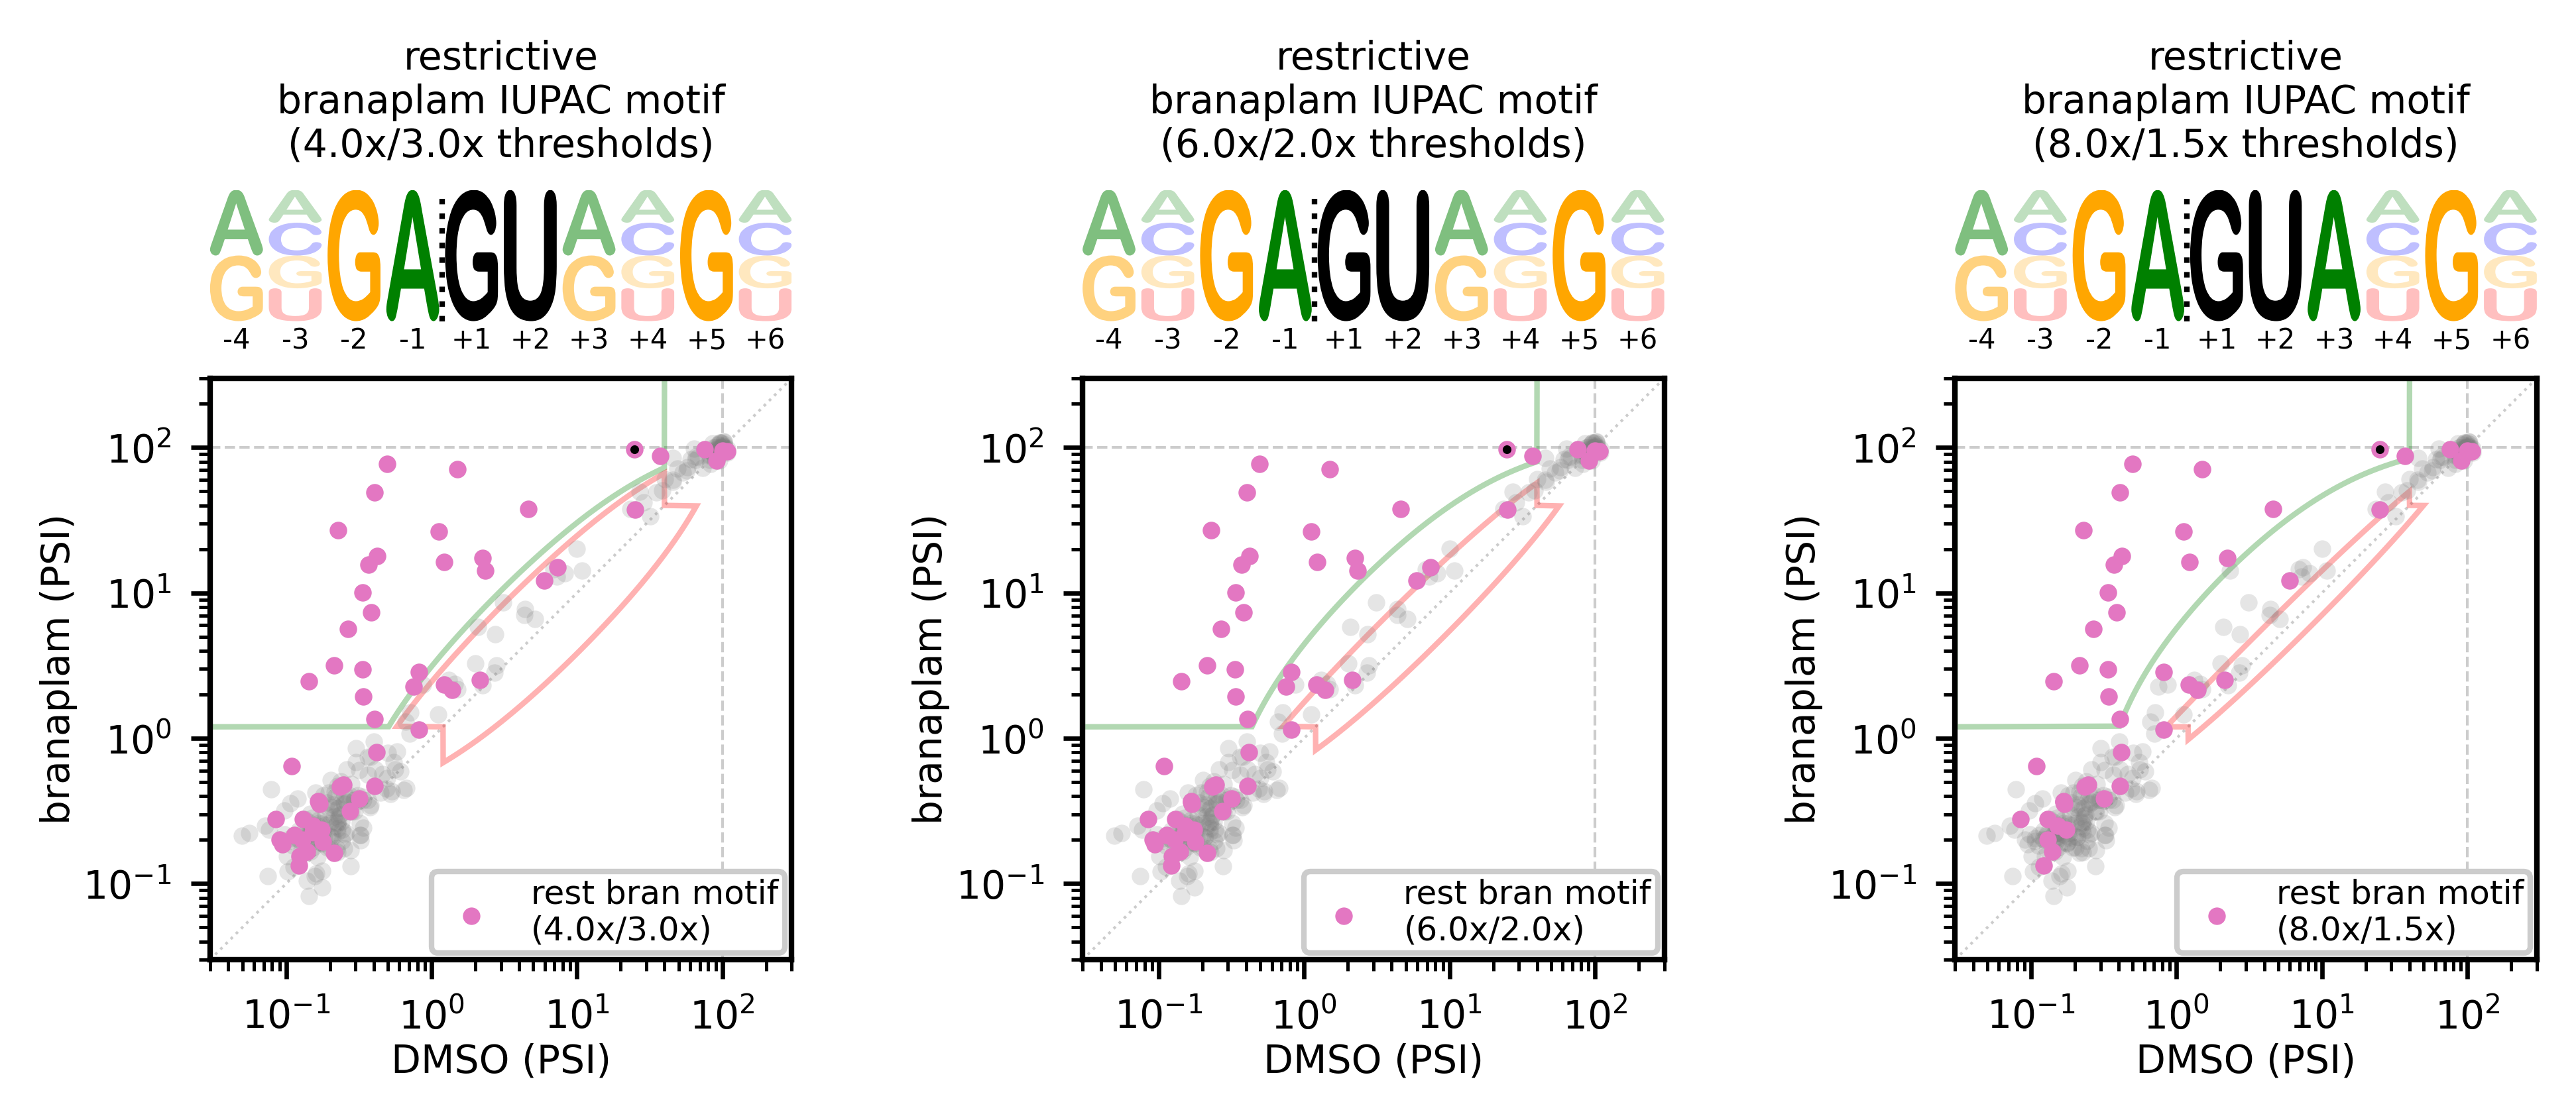

In [9]:
# Plot FigS4

# Set runtime params
motif_prefix = 'branaplam'
xlabel = 'DMSO (PSI)'
ylabel = 'branaplam (PSI)'

x=smn2_df['smn2_dmso'] 
y=smn2_df['smn2_nvs']

# Define positive and negative regions for branaplam treatment
pos_folds = np.array([4., 6., 8.])
neg_folds = np.array([3., 2., 1.5])

# Make figure
fig= plt.figure(figsize=[6.5, 2.9])
gs = GridSpec(2, 3, height_ratios=[.2,1], hspace=.05, wspace=.5, 
              left=.08, right=.98, bottom=.1, top=.80)
s=10
bulkalpha=.3

for i in range(3):
    pos_fold = pos_folds[i]
    neg_fold = neg_folds[i]
    pos_xy, neg_xy = utils.get_cut_polygons(
                                bg_x_psi=psi_dmso_null,
                                bg_y_psi=psi_bran_null,
                                neg_fold=neg_fold,
                                pos_fold=pos_fold,
                                lo_psi=1.2,
                                hi_psi=40,
                                lims=lims)

    # Define set of activated and non-activated sites
    act_ix = utils.does_polygon_contain(pos_xy, zip(x,y)) 
    nact_ix = utils.does_polygon_contain(neg_xy, zip(x,y)) 
    und_ix = (~act_ix) & (~nact_ix)

    def draw(ax, ix, label, motif):
        patch_kwargs = dict(facecolor = 'none', linestyle='-', linewidth=1, alpha=.3)
        ax.add_patch(Polygon(pos_xy, edgecolor='g', **patch_kwargs))
        ax.add_patch(Polygon(neg_xy, edgecolor='r', **patch_kwargs))
        ax.scatter(x, y, alpha=.2, s=s, linewidth=0, color='C7')
        ax.scatter(x[ix], y[ix], alpha=1, s=s, linewidth=0, facecolor='C6', label=label)
        ax.scatter(x[wt_ix], y[wt_ix], alpha=1, s=s/4, linewidth=0, color='k')
        style_ax(ax, xlabel=xlabel, ylabel=ylabel)
        utils.add_click_labels(x, y, seqs, ax)
        ax.set_title(f'{label} motif: {motif}')


    # Compute maximal motif and associated stats
    minimal_motif, __ = \
        utils.get_sufficient_and_necessary_motifs(seqs, 
                                                  in_ix=act_ix,
                                                  ex_ix=nact_ix, 
                                                  num_trials=100)
    print(f'{motif_prefix} minimal pos motif: {minimal_motif}')
    minimal_ix = utils.motif_to_ix(minimal_motif, seqs)

    # Draw logo
    draw_logo(motif=minimal_motif, 
              ax=fig.add_subplot(gs[0,i]),
              title=f'restrictive\nbranaplam IUPAC motif\n({pos_fold}x/{neg_fold}x thresholds)')

    # Draw scatter
    ax = fig.add_subplot(gs[1,i])
    draw(ax=ax, 
         ix=minimal_ix, 
         label=f'rest bran motif\n({pos_fold}x/{neg_fold}x)', 
         motif=minimal_motif)
    ax.set_title('')
    
fig.savefig('figS4.pdf')

Figure saved to figS9.pdf


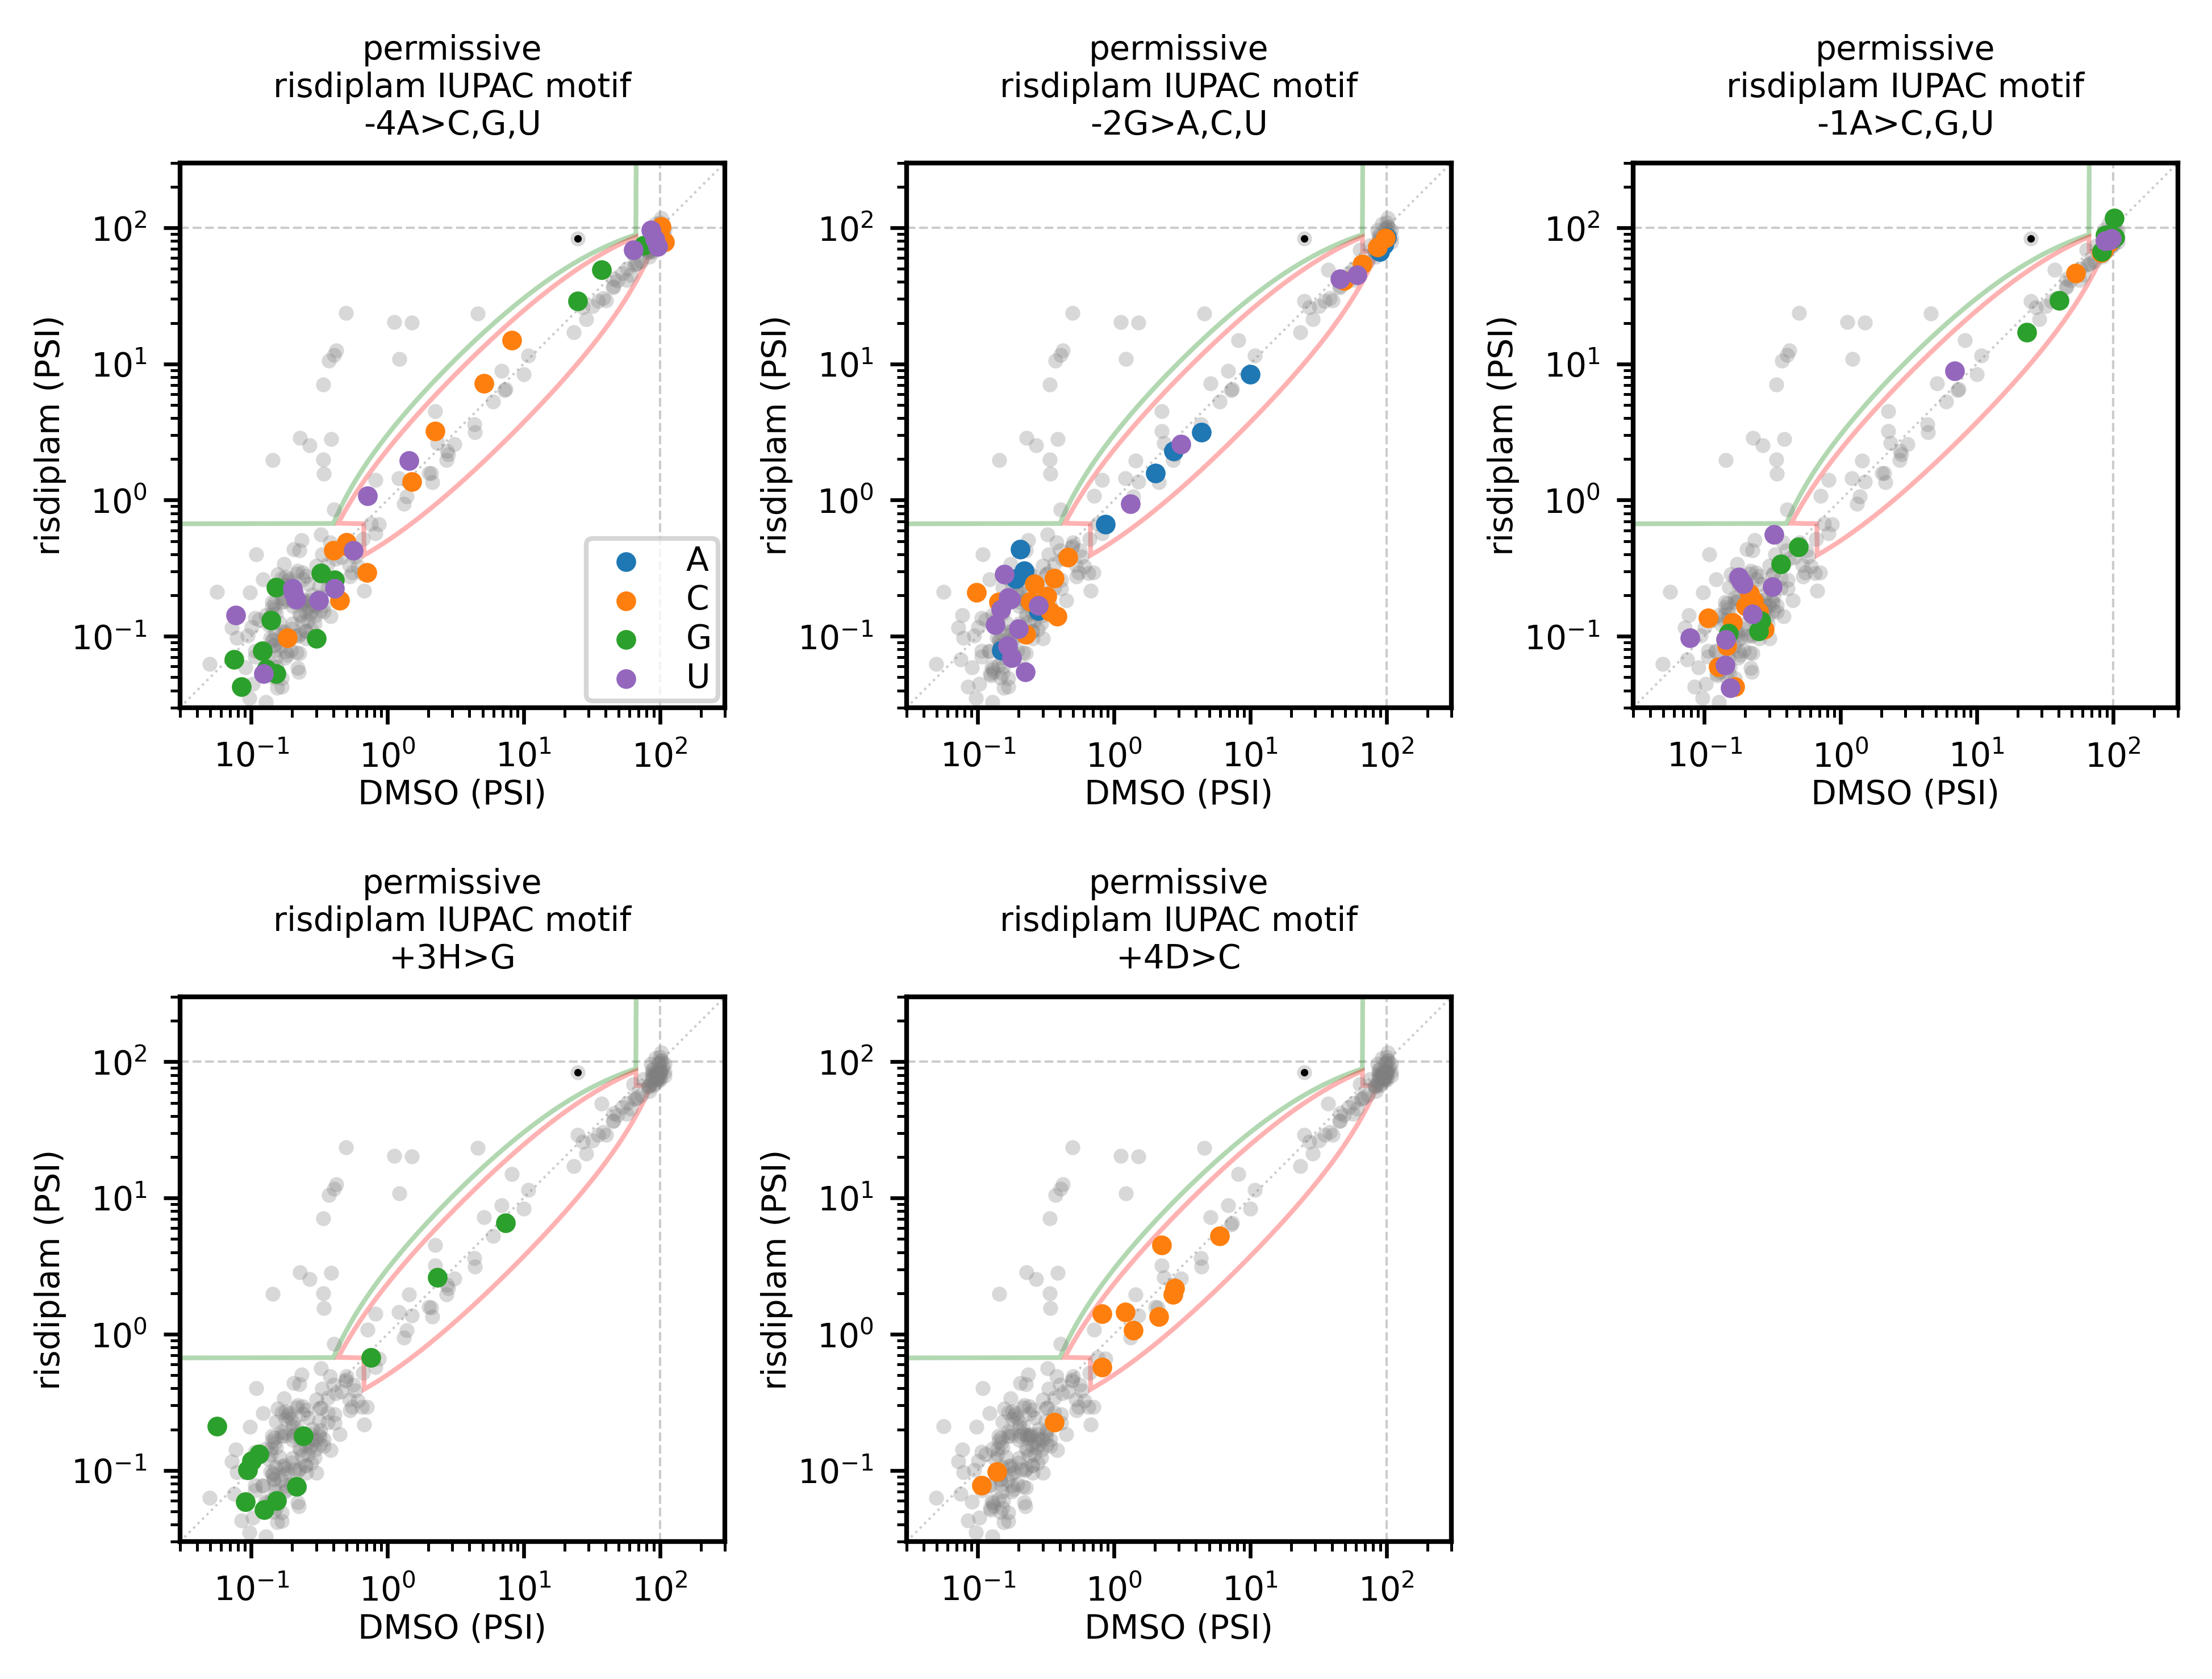

In [ ]:
# Plot mutations away from the necessary motif
lib_motif = 'NNNN/GUNNNN'
hit_motif = motifs['ris_max'] # ris max motif
color_dict = {'A':'C0', 'C':'C1', 'G':'C2', 'U':'C4'}
s=10

# Set x and y
x = psi_dmso
y = psi_ris

# Create dict of positions and bases to mutate to
pos_to_nt_pair = {}

# Iterate over positions
info_to_plot = []
for i in range(len(hit_motif)):
    
    # If motif nt at position is not equal to that in the library
    if hit_motif[i] != lib_motif[i]:
        pos = i-4
        motif_iupac = hit_motif[i]
        motif_bs = utils.iupac_nt_to_list(hit_motif[i])
        mut_bs = [b for b in 'ACGU' if b not in motif_bs]
        info_to_plot.append([pos, motif_iupac, mut_bs])

# Raw risdiplam vs DMSO
fig, axs = plt.subplots(2,3,figsize=[6.5,5], sharex=False, sharey=False)
axs = axs.ravel()

patch_kwargs = dict(facecolor = 'none', linestyle='-', linewidth=1, alpha=.3)

for i, (pos, motif_iupac, mut_bs) in enumerate(info_to_plot):
    
    #  Set ax
    ax = axs[i]
    
    # Show positive and negative regions
    ax.add_patch(Polygon(ris_pos_xy, edgecolor = 'g', **patch_kwargs))
    ax.add_patch(Polygon(ris_neg_xy, edgecolor = 'r', **patch_kwargs))
    
    # Plot non-null and wt
    ax.scatter(x[~null_ix], y[~null_ix], alpha=bulkalpha, s=s, linewidth=0, color='C7')
    ax.scatter(x[wt_ix], y[wt_ix], alpha=1, s=s/4, linewidth=0, color='k')
    
    # Plot variants
    for b in mut_bs:
        test_motif = list(hit_motif)
        test_motif[pos+4] = b
        test_motif = ''.join(test_motif)
        test_re = utils.iupac_to_regex(test_motif)
        test_ix = np.array([bool(re.match(test_re, seq)) for seq in smn2_df.index.values])
        ax.scatter(x[test_ix], y[test_ix], alpha=1,  linewidth=1, s=s, color=color_dict[b])
        
    #  Style ax
    style_ax(ax, xlabel='DMSO (PSI)', ylabel='risdiplam (PSI)', legend=False)
    #utils.add_click_labels(x, y, seqs, ax, ix=~null_ix)
    ax.set_title(f'permissive\nrisdiplam IUPAC motif\n{pos:+d}{motif_iupac}>{",".join(mut_bs)}')
    
    if i==0:
        for b in 'ACGU':
            ax.scatter([1000],[1000], alpha=1,  linewidth=1, s=s, color=color_dict[b], label=b)
        ax.legend(loc='lower right')
    
    #if i!=0:
    #    ax.get_legend().remove()
    
axs[-1].axis('off')
        
# Save figure
plt.tight_layout()
fig_name = 'figS9.pdf'
fig.savefig(fig_name)
print(f'Figure saved to {fig_name}')

Figure saved to figS10.pdf


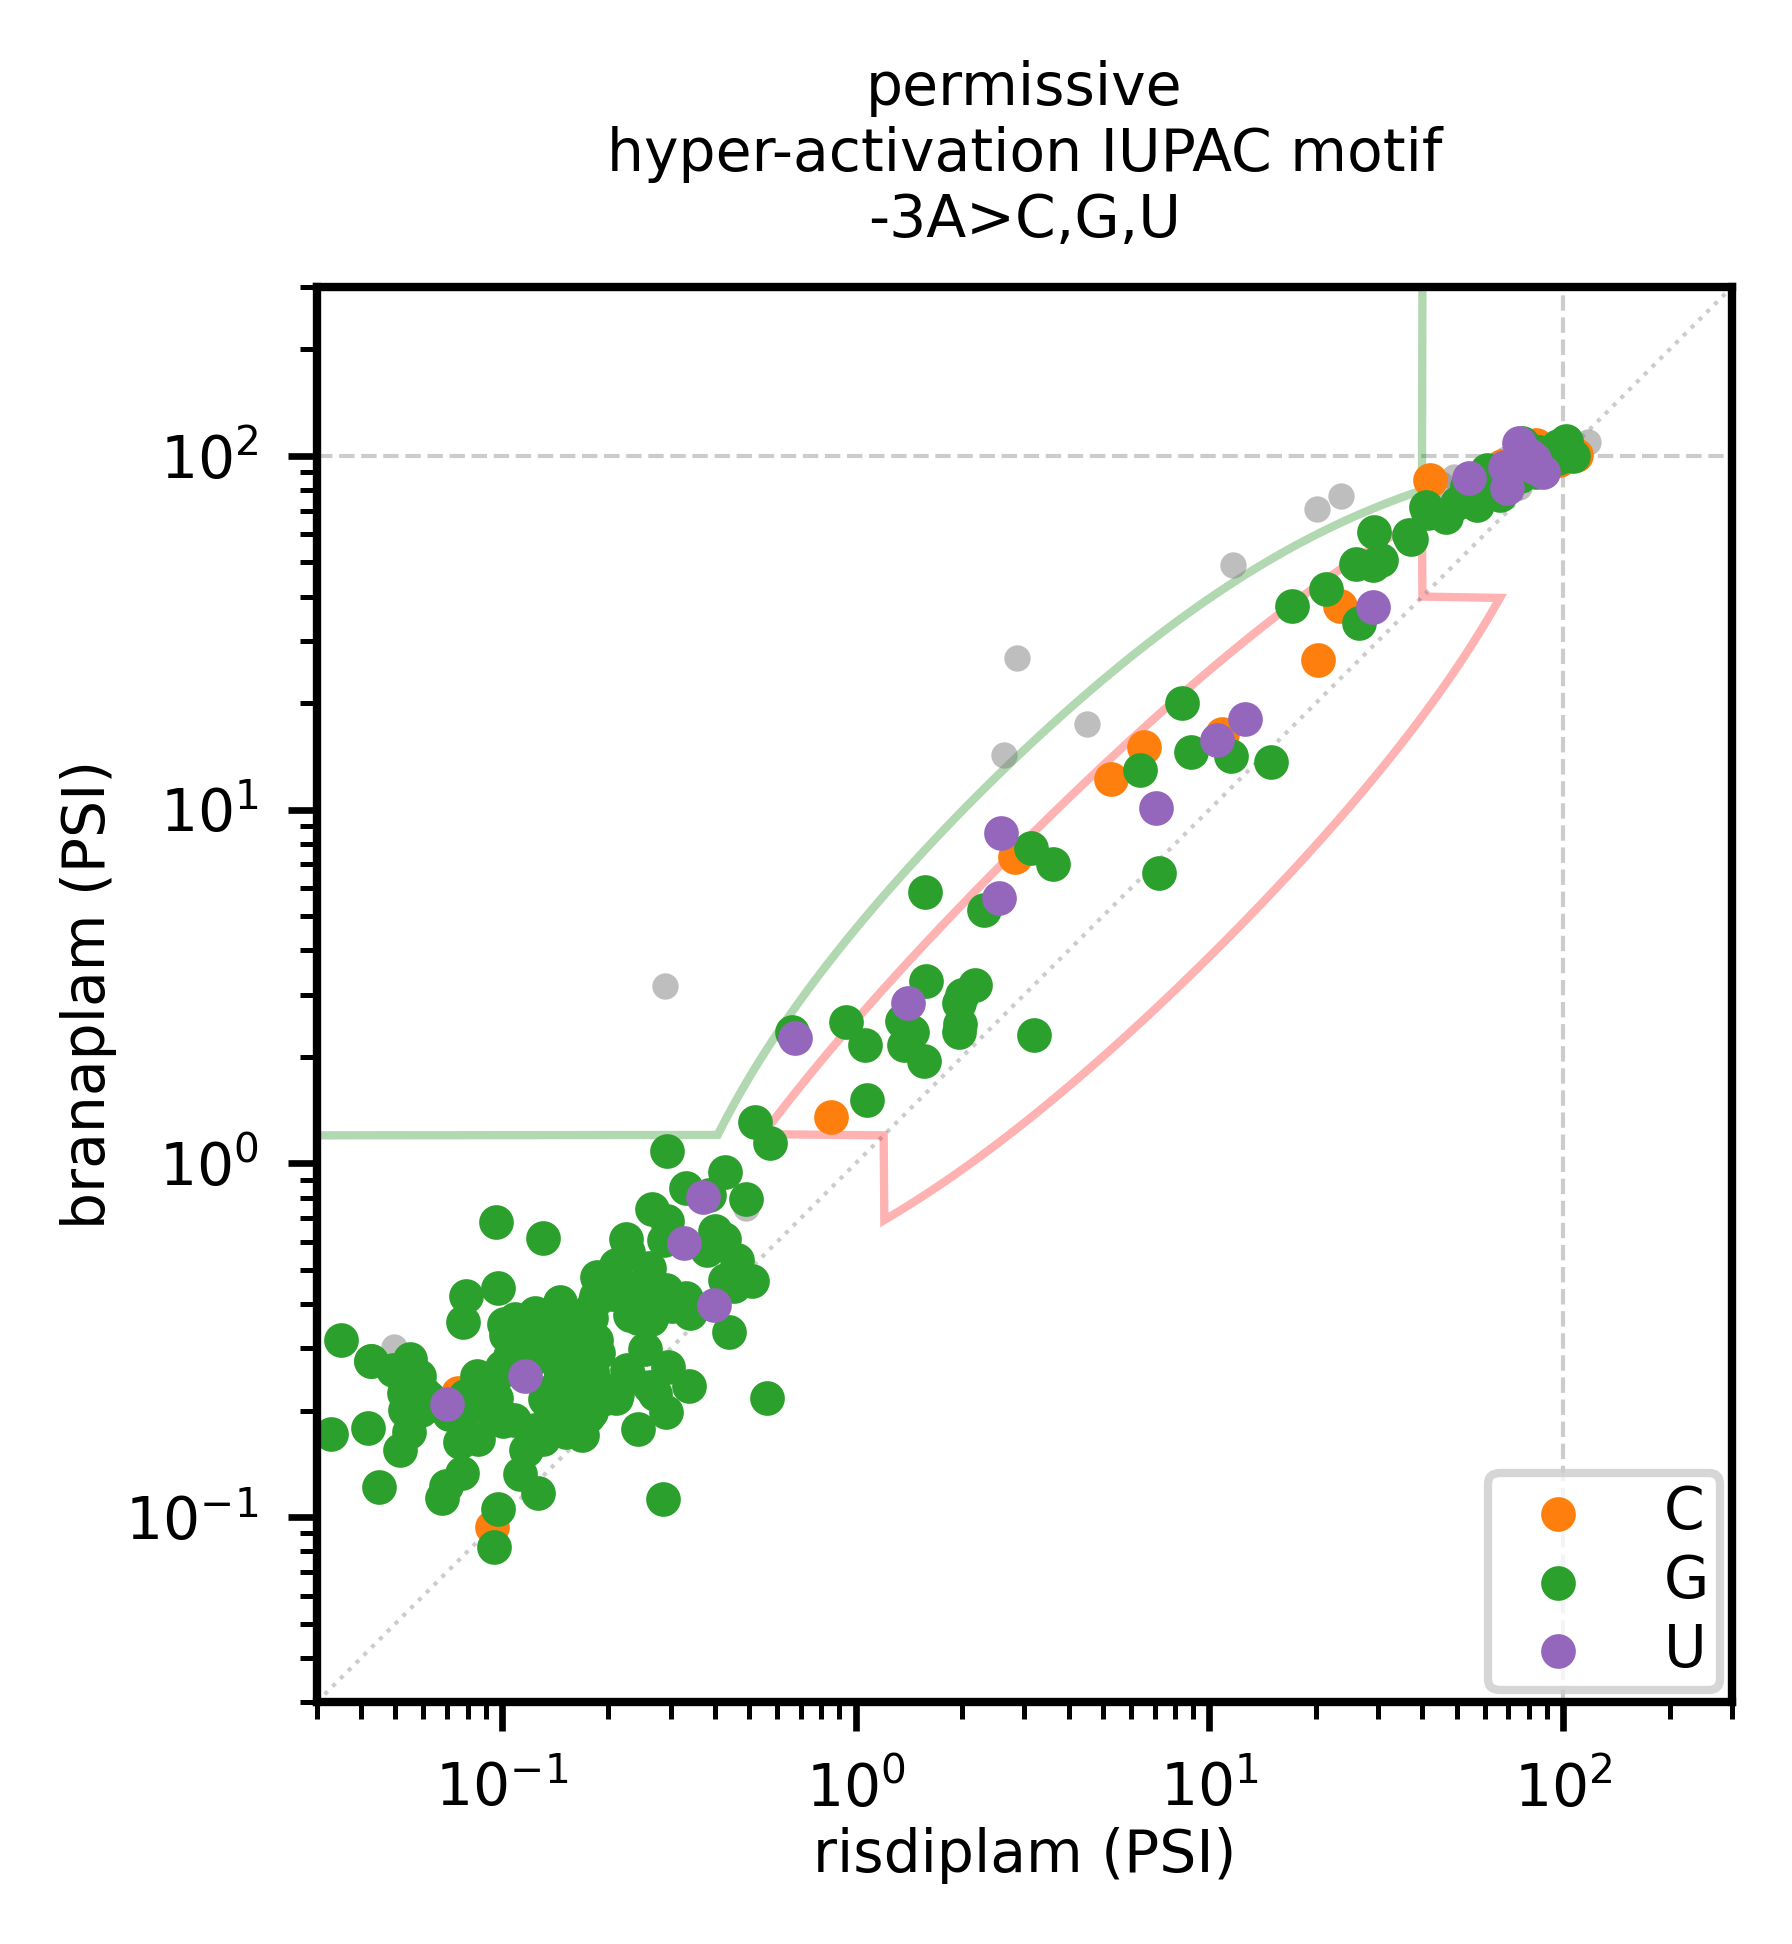

In [ ]:
# Plot mutations away from the maximal motif
lib_motif = 'NNNN/GUNNNN'
hit_motif = motifs['hyp_max']  # hyp max motif
color_dict = {'A':'C0', 'C':'C1', 'G':'C2', 'U':'C4'}
s=10

# Set x and y
x = psi_ris
y = psi_bran

# Create dict of positions and bases to mutate to
pos_to_nt_pair = {}

# Iterate over positions
info_to_plot = []
for i in range(len(hit_motif)):
    
    # If motif nt at position is not equal to that in the library
    if hit_motif[i] != lib_motif[i]:
        pos = i-4
        motif_iupac = hit_motif[i]
        motif_bs = utils.iupac_nt_to_list(hit_motif[i])
        mut_bs = [b for b in 'ACGU' if b not in motif_bs]
        info_to_plot.append([pos, motif_iupac, mut_bs])

# Raw risdiplam vs DMSO
fig, ax = plt.subplots(1,1,figsize=[3.25,3.25], sharex=False, sharey=False)
#axs = axs.ravel()

for i, (pos, motif_iupac, mut_bs) in enumerate(info_to_plot):
    
    #  Set ax
#     ax = axs[i]
    
    # Show positive and negative regions
    ax.add_patch(Polygon(hyp_pos_xy, edgecolor = 'g', **patch_kwargs))
    ax.add_patch(Polygon(hyp_neg_xy, edgecolor = 'r', **patch_kwargs))
    
    # Plot non-null and wt
    ax.scatter(x[~null_ix], y[~null_ix], alpha=.5, s=s, linewidth=0, color='C7')
    ax.scatter(x[wt_ix], y[wt_ix], alpha=1, s=s/4, linewidth=0, color='k')
    
    # Plot variants
    for b in mut_bs:
        test_motif = list(hit_motif)
        test_motif[pos+4] = b
        test_motif = ''.join(test_motif)
        test_re = utils.iupac_to_regex(test_motif)
        test_ix = np.array([bool(re.match(test_re, seq)) for seq in smn2_df.index.values])
        ix = test_ix
        ax.scatter(x[ix], y[ix], alpha=1, s=s, linewidth=1, color=color_dict[b], label=b)
    
    #  Style ax
    style_ax(ax, xlabel='risdiplam (PSI)', ylabel='branaplam (PSI)')
    utils.add_click_labels(x, y, seqs, ax, ix=~null_ix)
    ax.set_title(f'permissive\nhyper-activation IUPAC motif\n{pos:+d}{motif_iupac}>{",".join(mut_bs)}')
    ax.legend(loc='lower right')
            
# Save figure
plt.tight_layout()
fig_name = 'figS10.pdf'
fig.savefig(fig_name)
print(f'Figure saved to {fig_name}')